In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.corpus import stopwords
import networkx as nx
import community
import random
import string
import operator
from collections import Counter
from community import community_louvain

%matplotlib inline

In [2]:
df_reviews = pd.read_csv('review_master.txt', encoding='utf-8', sep='\t')
del df_reviews['Unnamed: 0']

In [3]:
df_reviews = df_reviews.sort_values('timestamp_combined', ascending=False)

In [4]:
df_reviews = df_reviews.reset_index(drop=True)

In [5]:
df_half = df_reviews.iloc[0 : int(len(df_reviews['userId'])/450)]

In [6]:
S1 = pd.read_csv('S1.csv',encoding='utf-8')

In [7]:
S1.head()

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


In [8]:
def cal_sentiment(lst):
    # create a word count dictionary to keep track of the frequency of the words
    word_count = {}
    all_count = Counter(lst)
    
    for i in set(lst):
        if i in list(S1["word"]):
            word_count[i] = all_count[i]
    
    # computation for the sentiment score based on the formula
    total_freq = sum(list(word_count.values()))
    result = 0
    for word in word_count.keys():
        p = word_count[word]/total_freq
        h = float(S1[S1["word"] == word]["happiness_average"])
        result += p*h
    
    return result

In [9]:
df_half.head()

,userId,movieId,userId_movieId,rating_combined,tag_combined,timestamp_combined
0,82922,167780,82922167780,4.0,NaN,1.537945e+09
1,82922,53519,8292253519,4.0,NaN,1.537945e+09
2,280481,494,280481494,3.0,NaN,1.537945e+09
3,280481,2355,2804812355,3.0,NaN,1.537945e+09
4,280481,2294,2804812294,2.0,NaN,1.537945e+09


In [10]:
list(df_half[df_half['userId']==82922]['movieId'])

[167780,
 53519,
 165831,
 52281,
 99766,
 1089,
 968,
 185029,
 189783,
 192551,
 191367,
 111663,
 65216,
 90578,
 176933,
 189333]

In [11]:
user_movie = {}
for user in list(set(df_half['userId'])):
    if user not in user_movie:
        user_movie[user]=list(df_half[df_half['userId']==user]['movieId'])

In [12]:
user_tag ={}
for user in list(set(df_half['userId'])):
    if user not in user_tag:
        user_tag[user]=list(df_half[df_half['userId']==user]['tag_combined'])

In [13]:
df_half2 = df_half.copy()
df_half2 = df_half2[pd.notnull(df_half2['tag_combined'])]

In [14]:
user_tag_noNAN ={}
for user in list(set(df_half2['userId'])):
    if user not in user_tag_noNAN:
        user_tag_noNAN[user]=list(df_half2[df_half2['userId']==user]['tag_combined'])

In [15]:
user_tag_noNAN

{29184: ['{bittersweet, education, friendship, inspirational}'],
 167427: ['{aboriginal, Martin Freeman, post-apocalyptic}'],
 253957: ['{atmospheric, black and white, Cinematography, Dialogues, femme fatale, film noir, Jane Greer, Kirk Douglas, Robert Mitchum}',
  '{corporate malfeasance, mental illness, mental institution, stalker, thriller}',
  '{Misleading horror, revenge, wrath}',
  '{Creepy, cult film, murder, psycho, psycho killer, psychopath, serial killer, shower}',
  '{atmospheric, cinematography, disturbing, folk horror, historical, history, horror, New England, Paranoia, psychological, Superstition, witchcraft}',
  '{attic, doll, found footage, haunting, high school friends, supernatural powers}',
  '{Body parts, Gore, Horror, Kelly Paterniti, Plot twist, Serial killer, Twist ending, Workplace}',
  '{ed helms, Jason Segel, relationships, signs, unravelling emotional issues}',
  '{comedy, Jim Carrey, over the top, silly fun}'],
 39942: ['{long, period piece}'],
 258053: ['{b

In [16]:
tags = list(df_half2[df_half2['userId']==29184]['tag_combined'])[0][1:-1]
tags2 = [i for i in tags.split(', ')]

In [17]:
tags2

['bittersweet', 'education', 'friendship', 'inspirational']

In [18]:
user_tag_clean = {}
stopwords_list = stopwords.words("english")

for user in user_tag_noNAN:
    user_tag_clean[user]=[]
    for tags in user_tag_noNAN[user]:
        tags = tags[1:-1] # remove '{' and '}'
        tags = [i for i in tags.split(', ')]
        
        for tag in tags:
            tag = [j for j in tag.split(' ')]
            tag = [j.lower() for j in tag]
            tag = [j.replace('-','') for j in tag]
            tag = [j for j in tag if j not in stopwords_list]
            user_tag_clean[user]+= tag
            

In [121]:
user_sentiment = {}

for user, tags in user_tag_clean.items():
    user_sentiment[user] = cal_sentiment(tags)

In [21]:
user_tag_clean[17633]

['atmospheric', 'minimalist']

In [22]:
user_tag_count = {}
for user in user_tag_noNAN:
    
    count = 0
       
    for tags in user_tag_noNAN[user]:
        tags = tags[1:-1] # remove '{' and '}'
        tags = [i for i in tags.split(', ')]
        

        for tag in tags:
            count += 1 
    user_tag_count[user] = count

In [23]:
#user_tag_count

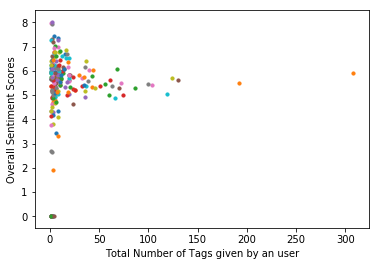

In [48]:
for user in user_sentiment:
    plt.scatter(user_tag_count[user], user_sentiment[user],s=10)
#plt.title("Sentiment score VS Number of Tags")
plt.xlabel ('Total Number of Tags given by an user')
plt.ylabel ('Overall Sentiment Scores')
plt.show()

In general, there isn't a pattern showing any relationship between the sentiment score and number of tags that a user gives. However, we can see that the majority of the users give less than 50 tags, and the tags tend to be positive or neutral. 

In [40]:
user_rating = df_half.groupby(['userId']).mean()['rating_combined']

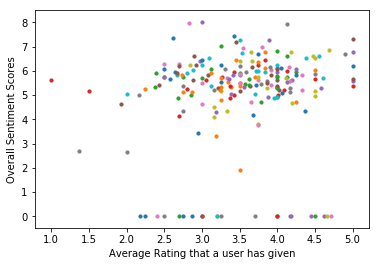

In [49]:
for user in user_sentiment:
    plt.scatter(user_rating[user], user_sentiment[user], s=10)
#plt.title("Sentiment score VS Number of Tags")
plt.xlabel ('Average Rating that a user has given')
plt.ylabel ('Overall Sentiment Scores')
plt.show()

describe scatter above 

In [25]:
all_tags = []
for user in user_tag_clean:
    for tag in user_tag_clean[user]:
        all_tags.append(tag)

In [26]:
tag_count = dict(Counter(all_tags))

In [27]:
max(tag_count.items(), key=operator.itemgetter(1))[0]

'comedy'

In [28]:
sorted(tag_count, key=tag_count.get, reverse=True)[:30]

['comedy',
 'atmospheric',
 'dark',
 'horror',
 'based',
 'scifi',
 'ending',
 'story',
 'twist',
 'bad',
 'plot',
 'visually',
 'romance',
 'book',
 'action',
 'space',
 'great',
 'film',
 'war',
 'nudity',
 'appealing',
 'predictable',
 'true',
 'acting',
 'drama',
 'dystopia',
 'friendship',
 'thriller',
 'funny',
 'humor']

By examine the most frequent tags given by users, we can see that users tend to give tags of genre and theme of the movies they watch. They tends to be neutral. 

In [30]:
count_of_reviews = df_half.groupby('userId').size()
# Due to the nature of our dataset, we are using Undirected graph
g = nx.Graph()

# Adding each unique users as nodes into graph
for user, count in count_of_reviews.items():
    g.add_node(user, size=count)

In [31]:
# get the common movies which users have watched 
# grouped them by the movie IDs 
condensed_movie_users = df_half.groupby('movieId')['userId'].apply(list)

In [32]:
# get the edge weights -- number of movies which both users watched in common
edgelist = {}
for movie, users in condensed_movie_users.items():
    lst = users
    
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            if lst[i] not in edgelist.keys():
                edgelist[lst[i]] = []
                edgelist[lst[i]].append(lst[j])
            else:
                edgelist[lst[i]].append(lst[j])

In [33]:
# add the edges 
for movie, users in condensed_movie_users.items():
    lst = users
    
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            weight = collections.Counter(edgelist[lst[i]])[lst[j]]
            g.add_edge(lst[i], lst[j], weight=weight)

In [34]:
pos = nx.spring_layout(g)

### community detection here

In [35]:
largest_connected_component = sorted(nx.connected_component_subgraphs(g), key = lambda x:len(x))[-1]

In [38]:
communities_generator = community_louvain.best_partition(largest_connected_component)
values = [communities_generator.get(node) for node in largest_connected_component.nodes()]

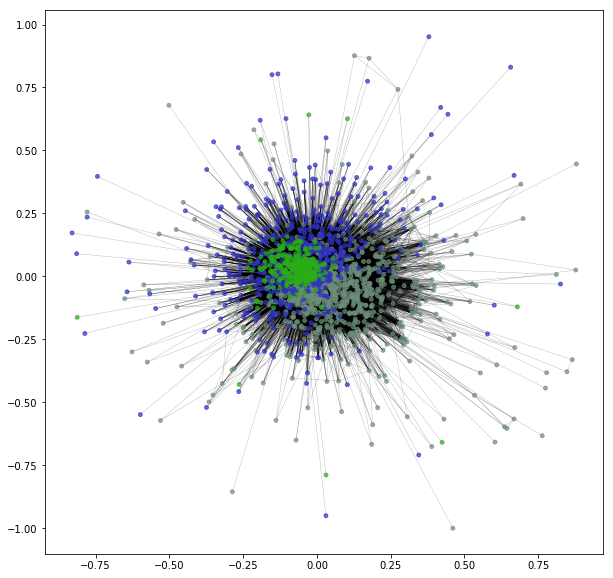

In [39]:
size = float(len(set(communities_generator.values())))
pos = nx.spring_layout(largest_connected_component)
count = 0

plt.figure(figsize=(10,10))

for com in set(communities_generator.values()) :
    count = count + 1.
    c = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    color = []
    
    # get all the nodes belonging to a community 
    list_nodes = [nodes for nodes in communities_generator.keys()
                                if communities_generator[nodes] == com]
    
    for n in list_nodes: # color generator
        color.append(c)
        
    nx.draw_networkx_nodes(largest_connected_component, pos, list_nodes, node_size = 15, alpha=0.7,
                                node_color=color)


nx.draw_networkx_edges(largest_connected_component,pos, alpha=0.4, width=0.3)

plt.show()

In [50]:
# get the userIds that are clustered into their respective communities
nodes_in_coms = {}

for com in set(communities_generator.values()) :
    
    # get all the nodes belonging to a community 
    list_nodes = [nodes for nodes in communities_generator.keys()
                                if communities_generator[nodes] == com]
    nodes_in_coms[com] = list_nodes

In [51]:
com1_users =  nodes_in_coms[0]
com2_users =  nodes_in_coms[1]
com3_users =  nodes_in_coms[2]

In [52]:
def user_watch_movies(user_list):
    output = {}
    for user in user_list:
        movies = list(df_half[df_half['userId']==user]['movieId'])
        output[user]=movies
    return output

In [53]:
def user_tag_movies(user_list):
    output = {}
    df_half2 = df_half[pd.notnull(df_half['tag_combined'])]
    for user in user_list:
        movies = list(df_half2[df_half2['userId']==user]['movieId'])
        output[user]=movies
    return output

In [54]:
def user_clean_tags(user_list):
    
    df_half2 = df_half[pd.notnull(df_half['tag_combined'])]
    
    user_tag_noNAN ={}
    for user in user_list:
        if user not in user_tag_noNAN:
            user_tag_noNAN[user]=list(df_half2[df_half2['userId']==user]['tag_combined'])
   
    user_tag_clean = {}
    stopwords_list = stopwords.words("english")

    for user in user_list:
        user_tag_clean[user]=[]
        for tags in user_tag_noNAN[user]:
            tags = tags[1:-1] # remove '{' and '}'
            tags = [i for i in tags.split(', ')]

            for tag in tags:
                tag = [j for j in tag.split(' ')]
                tag = [j.lower() for j in tag]
                tag = [j.replace('-','') for j in tag]
                tag = [j for j in tag if j not in stopwords_list]
                user_tag_clean[user]+= tag
                
    return user_tag_clean

In [55]:
def com_sentiments(user_list):
    x = user_clean_tags(user_list)
    user_sentiment = {}
    for user, tags in x.items():
        user_sentiment[user] = round(cal_sentiment(tags)*2)/2
        
    return user_sentiment

In [69]:
def sentiment_hist(sentiment_dic):
    scores = list(sentiment_dic.values())
    counts = Counter(scores)
    del counts[0]

    plt.bar(counts.keys(), counts.values(), width=0.2)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Number of Users', fontsize=13)
    plt.show()

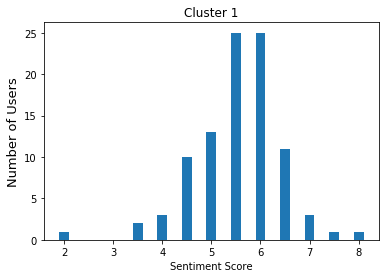

In [82]:
c1_scores = com_sentiments(com1_users)
plt.title("Cluster 1")
sentiment_hist(c1_scores)

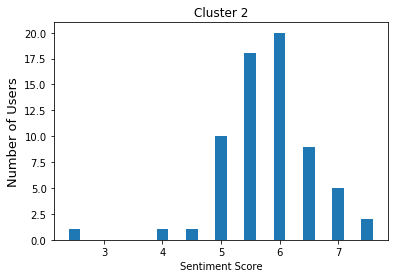

In [58]:
c2_scores = com_sentiments(com2_users)
plt.title("Cluster 2")
sentiment_hist(c2_scores)

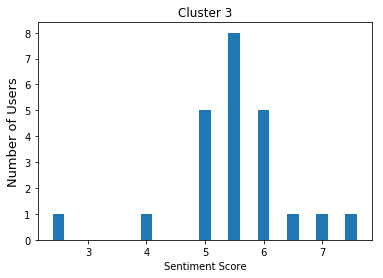

In [59]:
c3_scores = com_sentiments(com3_users)
plt.title("Cluster 3")
sentiment_hist(c3_scores)

In [66]:
def com_rating(user_list):
    user_ratings = {}
    for user in  user_list:
        user_ratings[user] = round(user_rating[user]*2)/2
        
    return user_ratings

In [70]:
def rating_hist(rating_dic):
    ratings = list(rating_dic.values())
    counts = Counter(ratings)
    del counts[0]

    plt.bar(counts.keys(), counts.values(), width=0.2)
    plt.xlabel('Ratings')
    plt.ylabel('Number of Users', fontsize=13)
    plt.show()

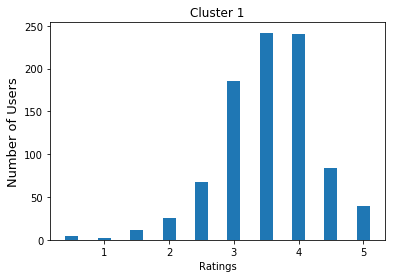

In [72]:
c1_ratings = com_rating(com1_users)
plt.title("Cluster 1")
rating_hist(c1_ratings)

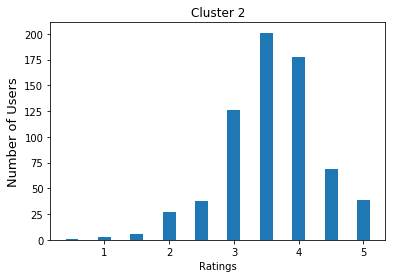

In [73]:
c2_ratings = com_rating(com2_users)
plt.title("Cluster 2")
rating_hist(c2_ratings)

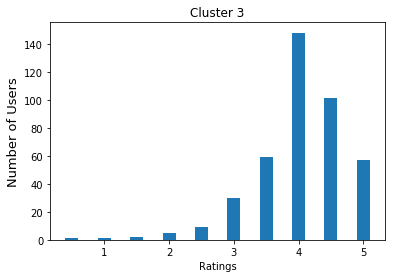

In [74]:
c3_ratings = com_rating(com3_users)
plt.title("Cluster 3")
rating_hist(c3_ratings)

In [78]:
def find_freq_tag(user_list, num):
    all_tags = []
    tags = user_clean_tags(user_list)
    for user in tags:
        for tag in tags[user]:
            all_tags.append(tag)
    tag_count = dict(Counter(all_tags))    
    results = sorted(tag_count, key=tag_count.get, reverse=True)[:num]
    return results

## Top tags given by each cluster

In [79]:
find_freq_tag(com1_users, 20)

['comedy',
 'horror',
 'bad',
 'plot',
 'dark',
 'story',
 'humor',
 'ending',
 'action',
 'atmospheric',
 'twist',
 'predictable',
 'acting',
 'family',
 'based',
 'scifi',
 'visually',
 'lgbtq+',
 'thriller',
 'great']

In [80]:
find_freq_tag(com2_users, 20)

['comedy',
 'atmospheric',
 'scifi',
 'ending',
 'based',
 'dark',
 'romance',
 'nudity',
 'twist',
 'space',
 'film',
 'visually',
 'book',
 'drama',
 'noir',
 'dystopia',
 'horror',
 'fantasy',
 'appealing',
 'love']

In [81]:
find_freq_tag(com3_users, 20)

['story',
 'true',
 'based',
 'dark',
 'war',
 'scifi',
 'comedy',
 'history',
 'classic',
 'drama',
 'period',
 'romantic',
 'dialogue',
 'romance',
 'psychology',
 'book',
 'philosophical',
 'thoughtprovoking',
 'social',
 'funny']

In [188]:
f1 = find_freq_tag(com1_users, 50)
f2 = find_freq_tag(com2_users, 50)
f3 = find_freq_tag(com3_users, 50)

In [194]:
common_tags = []

for i in f1:
    if i in f2 and i in f3:
        a = f1.index(i)
        b = f2.index(i)
        c = f3.index(i)
    
    common_tags.append([i, a+b+c])
    
common_tags = sorted(common_tags, key=lambda x: x[1], reverse=False)

## Top 5 common tags among communities

In [197]:
top5_common = [ i[0] for i in common_tags[:5] ]
top5_common

['comedy', 'dark', 'based', 'scifi', 'visually']

## Top 5 unique tags for each community

In [216]:
list(set(f1[:10]) - set(top5_common))[:5]

['bad', 'horror', 'ending', 'humor', 'plot']

In [217]:
list(set(f2[:10]) - set(top5_common))[:5]

['twist', 'nudity', 'romance', 'ending', 'space']

In [218]:
list(set(f3[:10]) - set(top5_common))[:5]

['war', 'true', 'drama', 'history', 'classic']

In [88]:
df_movies = pd.read_csv('movie_master.txt', encoding='utf-8', sep='\t')
del df_movies['Unnamed: 0']

In [89]:
df_movies.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [112]:
def find_freq_movie(user_list, num):
    all_movies = []
    movies = user_watch_movies(user_list)
    for user in movies:
        for movie in movies[user]:
            all_movies.append(movie)
    movie_count = dict(Counter(all_movies))    
    results = sorted(movie_count, key=movie_count.get, reverse=True)[:num]
    
    output = []
    
    for i in range(0, len(results)):
        movie_id = results[i]
        output.append((list(df_movies[df_movies['movieId']==movie_id]['title']),
                       list(df_movies[df_movies['movieId']==movie_id]['genres'])))
    
    final = []
    for i in output:
        movie=i[0][0]
        genre=i[1][0]
        final.append([movie, genre])
    return final

## Top movies watched by each cluster ##

In [113]:
find_freq_movie(com1_users, 10)

[['Avengers: Infinity War - Part I (2018)', 'Action|Adventure|Sci-Fi'],
 ['Deadpool 2 (2018)', 'Action|Comedy|Sci-Fi'],
 ['Solo: A Star Wars Story (2018)', 'Action|Adventure|Children|Sci-Fi'],
 ['Mission: Impossible - Fallout (2018)', 'Action|Adventure|Thriller'],
 ['Thor: Ragnarok (2017)', 'Action|Adventure|Sci-Fi'],
 ['Coco (2017)', 'Adventure|Animation|Children'],
 ['Three Billboards Outside Ebbing, Missouri (2017)', 'Crime|Drama'],
 ['Upgrade (2018)', 'Action|Comedy|Horror|Sci-Fi|Thriller'],
 ['Black Panther (2017)', 'Action|Adventure|Sci-Fi'],
 ['A Quiet Place (2018)', 'Drama|Horror|Thriller']]

In [114]:
find_freq_movie(com2_users, 10)

[['Lord of the Rings: The Return of the King, The (2003)',
  'Action|Adventure|Drama|Fantasy'],
 ['Lord of the Rings: The Fellowship of the Ring, The (2001)',
  'Adventure|Fantasy'],
 ['Inception (2010)', 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'],
 ['Ratatouille (2007)', 'Animation|Children|Drama'],
 ['Lord of the Rings: The Two Towers, The (2002)', 'Adventure|Fantasy'],
 ['The Hunger Games (2012)', 'Action|Adventure|Drama|Sci-Fi|Thriller'],
 ['Gladiator (2000)', 'Action|Adventure|Drama'],
 ['Avatar (2009)', 'Action|Adventure|Sci-Fi|IMAX'],
 ['Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
  'Action|Adventure|Comedy|Fantasy'],
 ['Shrek (2001)', 'Adventure|Animation|Children|Comedy|Fantasy|Romance']]

In [115]:
find_freq_movie(com3_users, 10)

[['Shawshank Redemption, The (1994)', 'Crime|Drama'],
 ['Matrix, The (1999)', 'Action|Sci-Fi|Thriller'],
 ['Fight Club (1999)', 'Action|Crime|Drama|Thriller'],
 ['Inception (2010)', 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'],
 ['Lord of the Rings: The Return of the King, The (2003)',
  'Action|Adventure|Drama|Fantasy'],
 ['Pulp Fiction (1994)', 'Comedy|Crime|Drama|Thriller'],
 ['Lord of the Rings: The Fellowship of the Ring, The (2001)',
  'Adventure|Fantasy'],
 ['Lord of the Rings: The Two Towers, The (2002)', 'Adventure|Fantasy'],
 ["Schindler's List (1993)", 'Drama|War'],
 ['Forrest Gump (1994)', 'Comedy|Drama|Romance|War']]

## Benchmarks for positive/negative tags for KH

In [ ]:
def user_clean_tags(user_list):
    
    df_half2 = df_half[pd.notnull(df_half['tag_combined'])]
    
    user_tag_noNAN ={}
    for user in user_list:
        if user not in user_tag_noNAN:
            user_tag_noNAN[user]=list(df_half2[df_half2['userId']==user]['tag_combined'])
   
    user_tag_clean = {}
    stopwords_list = stopwords.words("english")

    for user in user_list:
        user_tag_clean[user]=[]
        for tags in user_tag_noNAN[user]:
            tags = tags[1:-1] # remove '{' and '}'
            tags = [i for i in tags.split(', ')]

            for tag in tags:
                tag = [j for j in tag.split(' ')]
                tag = [j.lower() for j in tag]
                tag = [j.replace('-','') for j in tag]
                tag = [j for j in tag if j not in stopwords_list]
                user_tag_clean[user]+= tag
                
    return user_tag_clean

In [ ]:
def com_sentiments(user_list):
    x = user_clean_tags(user_list)
    user_sentiment = {}
    for user, tags in x.items():
        user_sentiment[user] = round(cal_sentiment(tags)*2)/2
        
    return user_sentiment

In [130]:
c1_scores = com_sentiments(com1_users)
c2_scores = com_sentiments(com2_users)
c3_scores = com_sentiments(com3_users)
all_scores = {**c1_scores, **c2_scores, **c3_scores}

In [134]:
def cal(user_scores):
    scores = []
    for key, value in user_scores.items():
        if value != 0:
            scores.append(value)
    mean = np.mean(scores)
    std = np.std(scores)
    return [mean, std]

In [138]:
c1_benchmark = cal(c1_scores)
c2_benchmark = cal(c2_scores)
c3_benchmark = cal(c3_scores)
all_benchmark = cal(all_scores)


In [143]:
c1_benchmark

[5.542105263157895, 0.8845550707164558]

In [144]:
c2_benchmark

[5.798507462686567, 0.7920298006818866]

In [145]:
c3_benchmark

[5.5, 0.9555330859059091]

In [146]:
all_benchmark

[5.629729729729729, 0.8711175999254791]